In [1]:
%cd ../../..

/Users/ericrobertbrewer/Code/BYU/Suitability/book-analyzer


# bookcave_titles

In [2]:
import os
import string

from matplotlib import pyplot as plt
import numpy as np

from python.sites.bookcave import bookcave
from python.util import shared_parameters

Using TensorFlow backend.


In [3]:
inputs, _, categories, category_levels = \
    bookcave.get_data({'titles', 'paragraph_tokens'},
                      subset_ratio=shared_parameters.DATA_SUBSET_RATIO,
                      subset_seed=shared_parameters.DATA_SUBSET_SEED,
                      min_len=shared_parameters.DATA_PARAGRAPH_MIN_LEN,
                      max_len=shared_parameters.DATA_PARAGRAPH_MAX_LEN,
                      min_tokens=shared_parameters.DATA_MIN_TOKENS,
                      categories_mode=shared_parameters.DATA_CATEGORIES_MODE,
                      return_overall=shared_parameters.DATA_RETURN_OVERALL)
titles = inputs['titles']
len(titles)

6395

In [4]:
titles[:10]

['Сorridors: Part Before (Talisman (Artefact) Book 1)',
 '10 Habits of Highly Effective People',
 '10 Minute Herbal Recipes for Weight Loss and Beauty: Quick and Easy Meals to Make You Look and Feel Better',
 '12 Days at Bleakly Manor (Once Upon a Dickens Christmas Book 1)',
 '12 Days to Love',
 '131 Creative Conversations For Families (131 Creative Conversations Book 2)',
 '1931 (The 1929 Series Book 6)',
 '1964 (Made In Yorkshire Saga Book 1)',
 '2024',
 '21 Hours']

In [5]:
VALID_CHARS = string.ascii_lowercase + ' 0123456789'
VALID_CHAR_SET = set(VALID_CHARS)

In [6]:
valid_titles = [''.join([c for c in title.lower() if c in VALID_CHAR_SET])
                for title in titles]
valid_titles[:10]

['orridors part before talisman artefact book 1',
 '10 habits of highly effective people',
 '10 minute herbal recipes for weight loss and beauty quick and easy meals to make you look and feel better',
 '12 days at bleakly manor once upon a dickens christmas book 1',
 '12 days to love',
 '131 creative conversations for families 131 creative conversations book 2',
 '1931 the 1929 series book 6',
 '1964 made in yorkshire saga book 1',
 '2024',
 '21 hours']

## Titles

In [7]:
lengths = list(map(len, valid_titles))
min_length = min(lengths)
max_length = max(lengths)

In [8]:
mins = [title for title in valid_titles if len(title) == min_length]
min_length, mins

(2, ['zo'])

In [9]:
maxs = [title for title in valid_titles if len(title) == max_length]
max_length, maxs

(209,
 ['therapeutic yoga efficient yoga sets at pain in the back and for the development of spine elasticity mindfulness therapy healthy living yoga sutras yoga poses teaching yoga benefits of yoga the yoga place book'])

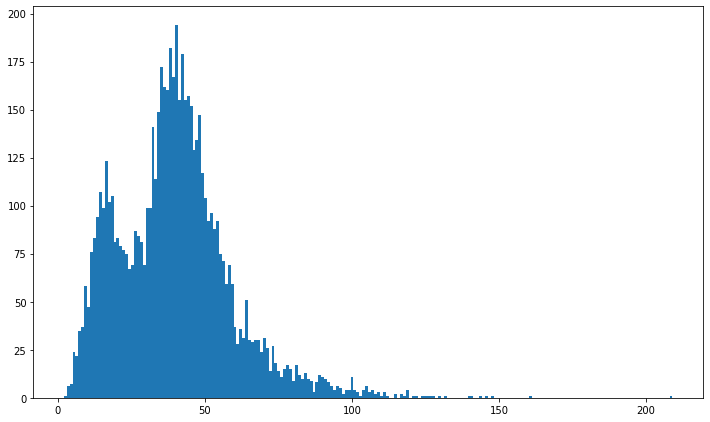

In [10]:
plt.figure(figsize=(12, 7.2))
plt.hist(lengths, bins=max_length - min_length + 1)
plt.show()

<= 128: 6386 (99.9%)


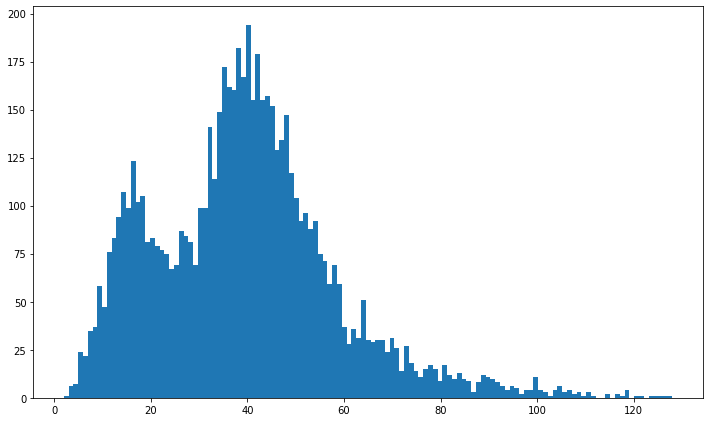

In [11]:
lengths_128 = [length for length in lengths if length <= 128]
print('<= 128: {:d} ({:.1%})'.format(len(lengths_128), len(lengths_128) / len(lengths)))
plt.figure(figsize=(12, 7.2))
plt.hist(lengths_128, bins=128 - min_length + 1)
plt.show()

<= 64: 5830 (91.2%)


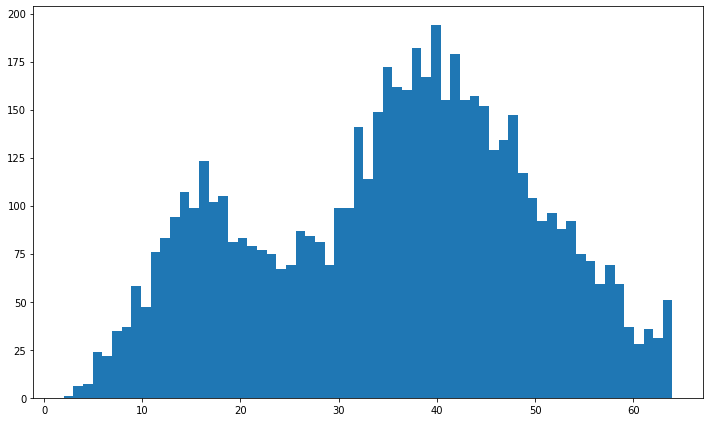

In [12]:
lengths_64 = [length for length in lengths if length <= 64]
print('<= 64: {:d} ({:.1%})'.format(len(lengths_64), len(lengths_64) / len(lengths)))
plt.figure(figsize=(12, 7.2))
plt.hist(lengths_64, bins=64 - min_length + 1)
plt.show()

## Characters

In [13]:
char_to_count = dict()
for title in valid_titles:
    for c in title:
        if c not in char_to_count:
            char_to_count[c] = 1
        else:
            char_to_count[c] += 1
len(char_to_count)

37

In [14]:
char_to_count['a']

15546

In [15]:
char_counts = sorted(list(char_to_count.items()),
                     key=lambda char_count: char_count[1],
                     reverse=True)
char_counts[:10]

[(' ', 38849),
 ('e', 25325),
 ('o', 21877),
 ('a', 15546),
 ('r', 14719),
 ('t', 14648),
 ('s', 13601),
 ('i', 13095),
 ('n', 12676),
 ('l', 9625)]

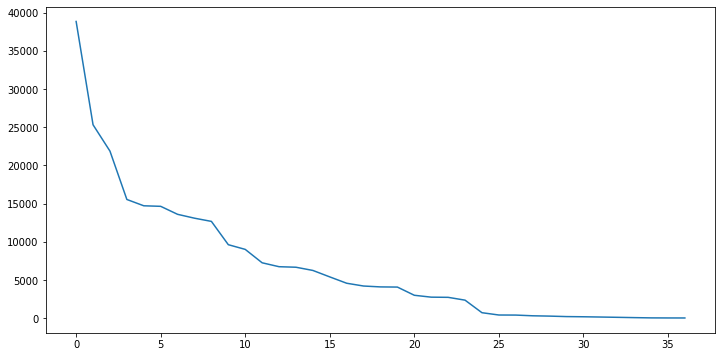

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(char_counts)), list(zip(*char_counts))[1])
plt.show()